In [2]:
import pandas as pd
df=pd.read_csv('/content/medquad1k.csv')
df

,Question,Answer,QType
0,What is (are) Floating-Harbor syndrome ?,Floating-Harbor syndrome is a genetic disorder...,information
1,What are the symptoms of Laryngeal Cancer ?,Signs and symptoms of laryngeal cancer include...,symptoms
2,What are the treatments for Fibrous dysplasia ?,How might fibrous dysplasia be treated? Unfort...,treatment
3,What are the treatments for autoimmune lymphop...,These resources address the diagnosis or manag...,treatment
4,What is (are) Cataract ?,The lens is a clear part of the eye that helps...,information
...,...,...,...
295,What to do for Hemolytic Uremic Syndrome in Ch...,"At the beginning of the illness, children with...",considerations
296,Is Rheumatic Fever inherited ?,Is rheumatic fever inherited? Rheumatic fever ...,inheritance
297,What is (are) Guttate psoriasis ?,Guttate psoriasis is a skin condition in which...,information
298,What is (are) Apert syndrome ?,Apert syndrome is a genetic disorder character...,information


# **GETTING WORD EMBEDDINGS**

In [3]:
!pip install keybert


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.4 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.8.3-py3-none-any.whl size=39126 sha256=0d195d44da4ed8bb719afc83ae72c3a449a79b7c8ff3a6b9eb563ab89539ac9a
  Stored in directory: /root/.cache/pip/wheels/70/88/07/1a3bc11fd1dd5f89924a02dcbca89a3015e25e8faa31f904dc
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl 

In [4]:
from keybert import KeyBERT
doc = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal).
         A supervised learning algorithm analyzes the training data and produces an inferred function,
         which can be used for mapping new examples. An optimal scenario will allow for the
         algorithm to correctly determine the class labels for unseen instances. This requires
         the learning algorithm to generalize from the training data to unseen situations in a
         'reasonable' way (see inductive bias)."""
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)
print(keywords)

[('supervised', 0.6676), ('labeled', 0.4896), ('learning', 0.4813), ('training', 0.4134), ('labels', 0.3947)]


In [5]:
sentences=df['Answer'].tolist()[:100]

In [6]:
c=0
extracted_keywords=[]
for item in sentences:
  keywords = kw_model.extract_keywords(item)
  extracted_keywords.append(keywords)
  print(c," ",end=" ")
  c=c+1




0   1   2   3   4   5   6   7   8   9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98   99   [[('floating', 0.4839), ('syndrome', 0.4524), ('harbor', 0.4219), ('disorder', 0.3614), ('genetic', 0.3455)], [('hoarseness', 0.5207), ('laryngeal', 0.4894), ('symptoms', 0.4301), ('throat', 0.3859), ('cancer', 0.3549)], [('dysplasia', 0.4352), ('fractures', 0.3834), ('treatment', 0.3222), ('bone', 0.293), ('fibrous', 0.2913)], [('autoimmune', 0.439), ('lymphoproliferative', 0.3766), ('leukoproliferative', 0.3696), ('diagnosis', 0.3363), ('alps', 0.323)], [('cataract', 0.566), ('blurred', 0.5292), ('lens'

In [7]:
print(extracted_keywords)

[[('floating', 0.4839), ('syndrome', 0.4524), ('harbor', 0.4219), ('disorder', 0.3614), ('genetic', 0.3455)], [('hoarseness', 0.5207), ('laryngeal', 0.4894), ('symptoms', 0.4301), ('throat', 0.3859), ('cancer', 0.3549)], [('dysplasia', 0.4352), ('fractures', 0.3834), ('treatment', 0.3222), ('bone', 0.293), ('fibrous', 0.2913)], [('autoimmune', 0.439), ('lymphoproliferative', 0.3766), ('leukoproliferative', 0.3696), ('diagnosis', 0.3363), ('alps', 0.323)], [('cataract', 0.566), ('blurred', 0.5292), ('lens', 0.512), ('focus', 0.476), ('retina', 0.4579)], [('lactose', 0.4779), ('lactase', 0.4149), ('deficiency', 0.3532), ('diet', 0.2369), ('tolerance', 0.2177)], [('interleukin', 0.4844), ('herpesvirus', 0.444), ('immune', 0.4072), ('hiv', 0.4063), ('disease', 0.3858)], [('inherited', 0.4781), ('recessive', 0.3909), ('hypophosphatemic', 0.3906), ('chromosome', 0.3884), ('chromosomes', 0.3767)], [('cancer', 0.3446), ('risk', 0.3365), ('intestine', 0.3331), ('diet', 0.2834), ('celiac', 0.170

In [8]:
!pip install transformers


In [9]:
from transformers import BertTokenizer, BertModel
import torch

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)


In [10]:
keyywords=[]
for item in extracted_keywords:
  list=[]
  for x in item:
    list.append(x[0])
  keyywords.append(list)
keyywords

[['floating', 'syndrome', 'harbor', 'disorder', 'genetic'],
 ['hoarseness', 'laryngeal', 'symptoms', 'throat', 'cancer'],
 ['dysplasia', 'fractures', 'treatment', 'bone', 'fibrous'],
 ['autoimmune',
  'lymphoproliferative',
  'leukoproliferative',
  'diagnosis',
  'alps'],
 ['cataract', 'blurred', 'lens', 'focus', 'retina'],
 ['lactose', 'lactase', 'deficiency', 'diet', 'tolerance'],
 ['interleukin', 'herpesvirus', 'immune', 'hiv', 'disease'],
 ['inherited', 'recessive', 'hypophosphatemic', 'chromosome', 'chromosomes'],
 ['cancer', 'risk', 'intestine', 'diet', 'celiac'],
 ['diagnosis', 'diagnosed', 'disease', 'symptoms', 'amyloid'],
 ['incontinence', 'bladder', 'urinary', 'urinate', 'urine'],
 ['pcos', 'ovaries', 'hormones', 'ovary', 'hormone'],
 ['cadasil', 'rare', 'prevalence', 'condition', 'unknown'],
 ['prognosis', 'cancer', 'tumor', 'progesterone', 'estrogen'],
 ['symptoms', 'gorlin', 'moss', 'hypoplasia', 'syndrome'],
 ['ophthalmoplegia', 'syndrome', 'deafness', 'konigsmark', 'hu

In [11]:
wordlist=[]
for item in keyywords:
  for x in item:
    wordlist.append(x)

print(len(wordlist))

500


In [13]:
all_embeddings = []

for sentence, keyword_list in zip(sentences, keyywords):

    tokens = tokenizer(sentence, padding=True, truncation=True, return_tensors="pt")

    for keyword in keyword_list:

        keyword_tokens = tokenizer(keyword, return_tensors="pt")

        with torch.no_grad():
            keyword_embeddings = model(**keyword_tokens).last_hidden_state.mean(dim=1)
            print(f"Sentence: {sentence}")
            print(f"Keyword: {keyword}")
            print("Embedding:", keyword_embeddings)
            print("\n")
            c=c+1
        all_embeddings.append(keyword_embeddings)


Streaming output truncated to the last 5000 lines.
          3.5668e-01, -2.2824e-01, -2.1184e-01, -1.0037e-01, -1.3055e-01,
         -7.4059e-02, -3.9062e-01, -3.5600e-02,  1.2241e+00, -1.5988e-01,
         -9.6041e-02, -2.3665e-01, -1.2907e-02,  5.1094e-02,  5.0976e-01,
         -1.3437e-02,  5.8209e-01,  3.8586e-01, -4.0021e-01, -5.1316e-01,
          2.0694e-01, -1.7022e-01,  2.4498e-01, -8.8197e-02, -5.1969e-02,
          1.1987e-01,  9.3392e-02, -1.3232e-02, -1.3524e-01,  4.2449e-01,
          2.1310e-01,  5.6039e-02,  2.4819e-05,  2.6353e-01, -2.1252e-01,
          2.3026e-01,  1.7013e-01, -3.6246e-01, -3.8882e-03, -2.1365e-01,
         -1.3137e-01, -3.3274e-02, -1.0125e-01,  1.3278e-01,  4.4010e-01,
          6.0854e-01,  2.3405e-01,  1.1616e-01,  4.2374e-01, -3.7930e-01,
          4.0019e-02, -1.1680e-01,  7.8267e-01, -2.9831e-01,  2.2098e-01,
         -3.6236e-01,  1.8482e-01,  1.0302e+00, -1.9987e-01,  3.5451e-01,
          1.4488e-01,  4.3988e-01, -1.8586e-01,  3.2427e-02, 

In [14]:
print(len(all_embeddings))

500


In [15]:
import tensorflow as tf

length = tf.size(all_embeddings[0]).numpy()  # This gets the total number of elements
print(length)


768


<ipython-input-17-5418b2ad57f4>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  embeddings = np.array(all_embeddings[:100])


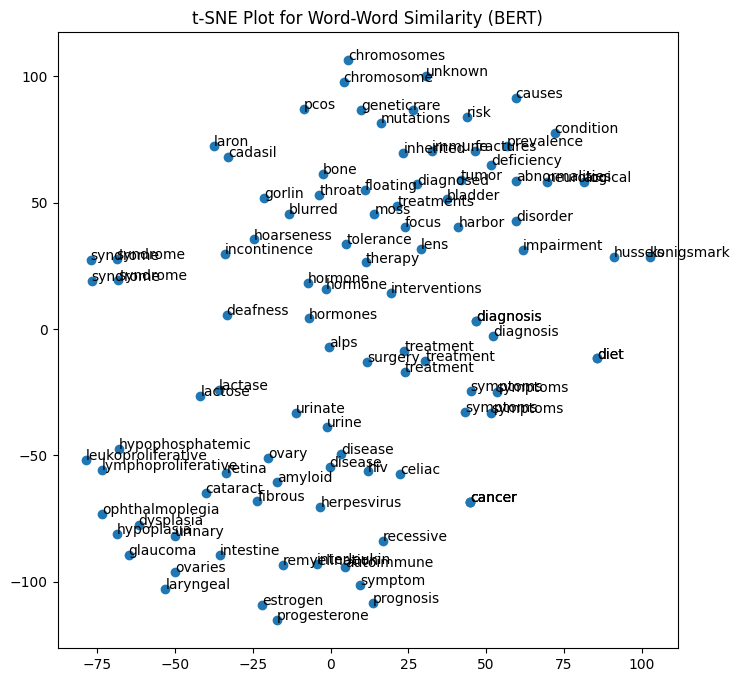

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
embeddings = np.array(all_embeddings[:100])

tsne = TSNE(n_components=2, perplexity=10, random_state=42)
concatenated_embeddings = np.concatenate(embeddings, axis=0)
tsne_embeddings = tsne.fit_transform(concatenated_embeddings)

plt.figure(figsize=(8, 8))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])

for i, word in enumerate(wordlist[:100]):
    plt.annotate(word, (tsne_embeddings[i, 0], tsne_embeddings[i, 1]))

plt.title("t-SNE Plot for Word-Word Similarity (BERT)")
plt.show()


